<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# __Boston Housing Statistics__

### Import the required libraries


In [3]:
import piplite
await piplite.install(['numpy'], ['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Read the dataset in the CSV file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(boston_url)

In [10]:
boston_df.rename(columns = {'Unnamed: 0': 'Town Id'}, inplace = True)
boston_df['Town Id'] = boston_df['Town Id'].astype('category')
boston_df.head()

,Town Id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


CRIM -> Per capita crime rate by town <br />
ZN -> Proportion of residential land zoned for lots over 25,000 sq.ft <br />
INDUS -> Proportion of non-retail business acres per town <br />
CHAS -> Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br />
NOX -> Nitric oxides concentration (parts per 10 million) <br />
RM -> Average number of rooms per dwelling <br />
AGE -> Proportion of owner-occupied units built prior to 1940 <br />
DIS -> Weighted distances to five Boston employment centres <br />
RAD -> Index of accessibility to radial highways <br />
TAX -> Full-value property-tax rate per \\$10,000 <br />
PTRATIO -> Pupil-teacher ratio by town <br />
LSTAT -> % Lower status of the population <br />
MEDV -> Median value of owner-occupied homes in $1000's

In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Town Id  506 non-null    category
 1   CRIM     506 non-null    float64 
 2   ZN       506 non-null    float64 
 3   INDUS    506 non-null    float64 
 4   CHAS     506 non-null    float64 
 5   NOX      506 non-null    float64 
 6   RM       506 non-null    float64 
 7   AGE      506 non-null    float64 
 8   DIS      506 non-null    float64 
 9   RAD      506 non-null    float64 
 10  TAX      506 non-null    float64 
 11  PTRATIO  506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 68.6 KB


In [15]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### T-test for Independent Samples

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance

_Is there a significant difference in median value of houses bounded by Charles River?_

In [127]:
sns.set(style = 'ticks')

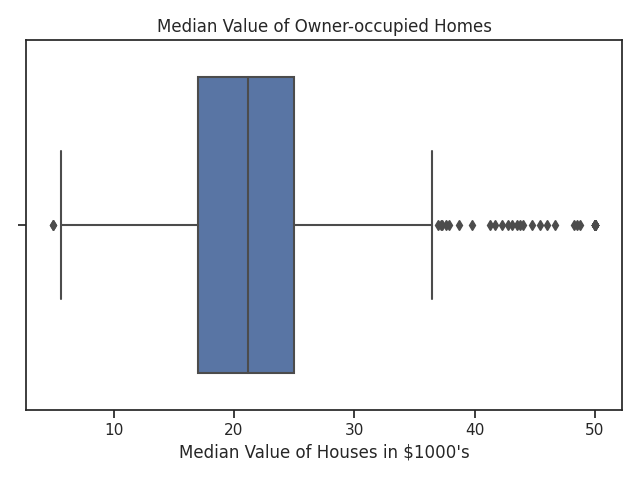

<Figure size 640x480 with 0 Axes>

In [129]:
# Boxplot for the "Median value of owner-occupied homes"
sns.boxplot(x = boston_df['MEDV'])

plt.xlabel("Median Value of Houses in $1000's")
plt.title('Median Value of Owner-occupied Homes')
plt.tight_layout()
plt.show()
plt.figure(figsize = None)

# We can assume it is normal

In [90]:
boston_df['CHAS'] = boston_df['CHAS'].astype('int64').astype('category')

In [131]:
df1 = boston_df[['MEDV', 'CHAS']]
df1 = df1.groupby(['CHAS'], as_index = False).mean().sort_values(by = 'MEDV', ascending = True)
df1['MEDV'] = round(df1['MEDV'], 1)
df1

,CHAS,MEDV
0,0,22.1
1,1,28.4


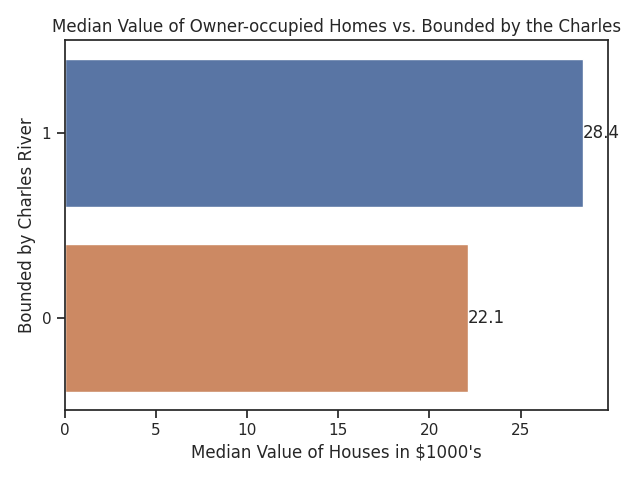

<Figure size 640x480 with 0 Axes>

In [132]:
# Bar-plot for the CHAS variable
ax = sns.barplot(
    x = 'MEDV',
    y = 'CHAS',
    data = df1,
    errorbar = ('ci', False),
    order = df1.sort_values('MEDV', ascending = False)['CHAS']
)

for i in ax.containers:
    ax.bar_label(i, )

plt.xlabel("Median Value of Houses in $1000's")
plt.ylabel('Bounded by Charles River')
plt.title('Median Value of Owner-occupied Homes vs. Bounded by the Charles')
plt.tight_layout()
plt.show()
plt.figure(figsize = None)

#ax.clear()

__Hypothesis:__
* H0: µ1 = µ2 --- "There is no difference in median value of houses bounded by the Charles"
* H1: µ1 ≠ µ2 --- "There is a difference in median value of houses bounded by Charles River"

In [154]:
bounded_value = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_value = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [155]:
# Homogeneity of variance test
scipy.stats.levene(
    bounded_value,
    not_bounded_value,
    center = 'mean'
)

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398285)

In [156]:
# Since the p-value is less than 0.05, then we use Welch's t-test
scipy.stats.ttest_ind(
    bounded_value,
    not_bounded_value,
    equal_var = False
)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

> **Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on the Charles boundary

### Analysis of Variance (ANOVA)

_Is there a difference in median values of houses for each proportion of owner-occupied units built prior to 1940?_

In [95]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 45) & (boston_df['AGE'] < 70), 'Age Group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age Group'] = '70 years and older'

boston_df.head()

,Town Id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Group
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


In [111]:
df2 = boston_df.sort_values(by = 'AGE', ascending = True).reset_index()
df2.head()

,index,Town Id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age Group
0,41,41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,4.84,26.6,35 years and younger
1,74,74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1,35 years and younger
2,73,73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,7.54,23.4,35 years and younger
3,43,43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,7.44,24.7,35 years and younger
4,70,70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,6.72,24.2,35 years and younger


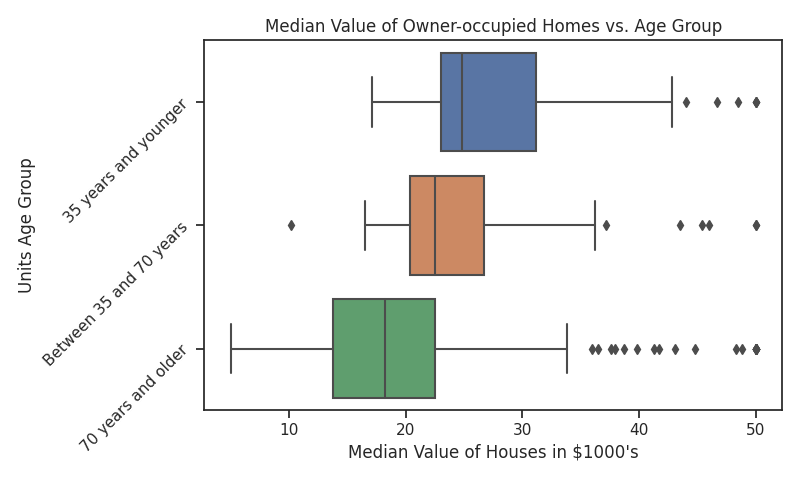

<Figure size 960x480 with 0 Axes>

In [136]:
# Boxplot for the MEDV variable vs. Age Group
sns.boxplot(
    x = 'MEDV',
    y = 'Age Group',    
    data = df2
)

plt.xlabel("Median Value of Houses in $1000's")
plt.ylabel('Units Age Group')
plt.title('Median Value of Owner-occupied Homes vs. Age Group')
plt.yticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.figure(figsize = (9.6, 4.8))

__Hypothesis:__
* H0: µ\_1 = µ\_2 = µ\_3 --- "The three population means are equal"
* H1: "At least one of the means differ"

In [157]:
young_value = boston_df[boston_df['Age Group'] == '35 years and younger']['MEDV']
middle_age_value = boston_df[boston_df['Age Group'] == 'Between 35 and 70 years']['MEDV']
old_value = boston_df[boston_df['Age Group'] == '70 years and older']['MEDV']

In [158]:
# Test for equality of variance
scipy.stats.levene(
    young_value,
    middle_age_value,
    old_value,
    center = 'mean'
)

LeveneResult(statistic=1.9293019231701198, pvalue=0.14640550221867854)

In [161]:
# Since the p-value is greater than 0.05, we can assume equality of variance (No need for Kruskal-Wallis' test)
f_stats, p_val = scipy.stats.f_oneway(
    young_value,
    middle_age_value,
    old_value
)

print('F-stats: {0},\np-value: {1}'.format(f_stats, p_val))

F-stats: 33.14722851005503,
p-value: 3.4568523744319426e-14


> **Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ

### Pearson Correlation

_Can we conclude that there is no relationship between nitric-oxide concentrations and proportion of non-retail business acres per town?_

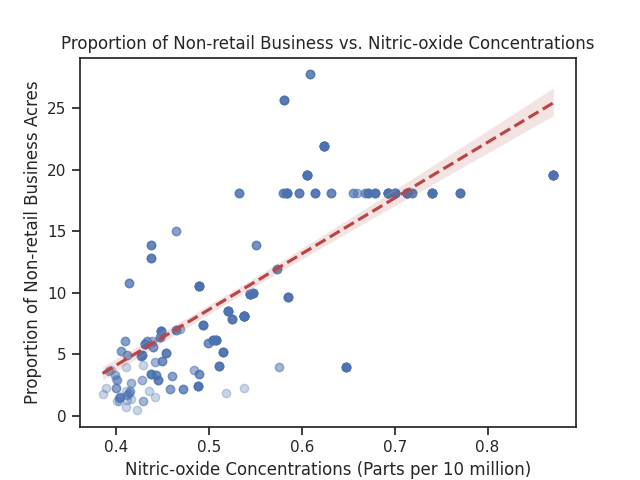

<Figure size 640x480 with 0 Axes>

In [147]:
# Scatter plot between nitric-oxide concentrations and the proportion of non-retail business acres per town
sns.regplot(
    x = 'NOX',
    y = 'INDUS',
    data = boston_df,
    scatter_kws = {'alpha': 0.3}, 
    line_kws = {'color': '#BB4444', 'linestyle': '--'}
)

plt.xlabel('Nitric-oxide Concentrations (Parts per 10 million)')
plt.ylabel('Proportion of Non-retail Business Acres')
plt.title('Proportion of Non-retail Business vs. Nitric-oxide Concentrations')
plt.show()
plt.figure(figsize = None)

__Hypothesis:__
* H0: The proportion of non-retail business acres per town is not correlated with nitric-oxide concentrations
* H1: The proportion of non-retail business acres per town is correlated with nitric-oxide concentrations

In [162]:
# Pearson correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

> **Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric-oxide concentrations and the proportion of non-retail business acres per town

### Regression Analysis

_What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?_

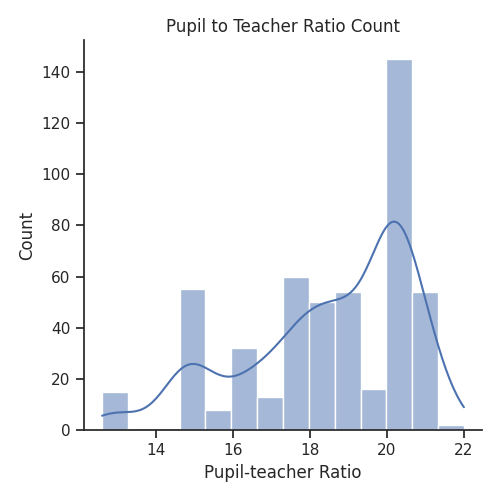

<Figure size 640x480 with 0 Axes>

In [144]:
# Histogram for the pupil to teacher ratio variable
sns.displot(boston_df['PTRATIO'], kde = True)

plt.xlabel('Pupil-teacher Ratio')
plt.title('Pupil to Teacher Ratio Count')
plt.tight_layout()
plt.show()
plt.figure(figsize = None)

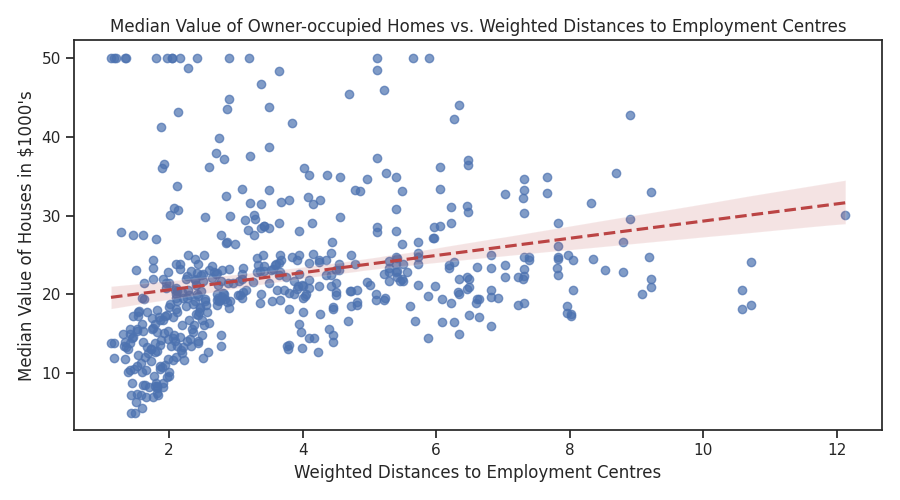

<Figure size 700x500 with 0 Axes>

In [165]:
# Scatter plot between "DIS" and "MEDV"
sns.regplot(
    x = 'DIS',
    y = 'MEDV',
    data = boston_df,
    scatter_kws = {'alpha': 0.7},
    line_kws = {'color': '#BB4444', 'linestyle': '--'}
)

plt.xlabel('Weighted Distances to Employment Centres')
plt.ylabel("Median Value of Houses in $1000's")
plt.title('Median Value of Owner-occupied Homes vs. Weighted Distances to Employment Centres')
plt.tight_layout()
plt.show()
plt.figure(figsize = (7, 5))

__Hypothesis:__
* H0: The median value of owner-occupied homes is not correlated with the weighted distances to five Boston employment centres
* H1: The median value of owner-occupied homes is correlated with the weighted distances to five Boston employment centres

In [169]:
# Regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

mdl = sm.OLS(y, X).fit()
prediction = mdl.predict(X)

mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        16:30:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Conclusion:** Since the p-value is less than 0.05 there is evidence of correlation between the weighted distances to five Boston employment centres and median value of owner-occupied homes

# Thank You!